<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
car = pd.read_csv("cardata.csv")

In [5]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car.shape

(301, 9)

In [7]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
car.isna().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
#encoding data(fuel type, seller type, transmission)
car.replace({"Fuel_Type": {"Petrol": 0, "Diesel": 1, "CNG": 2}}, inplace=True)
car.replace({"Seller_Type": {"Dealer": 0, "Individual": 1}}, inplace=True)
car.replace({"Transmission": {"Manual": 0, "Automatic": 1}}, inplace=True)

In [10]:
x = car.drop(["Car_Name", "Selling_Price"], axis=1)
y = car["Selling_Price"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [14]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [16]:
train_pred = lin_model.predict(x_train)

In [18]:
error = r2_score(y_train, train_pred)
print(error)

0.8838169193709796


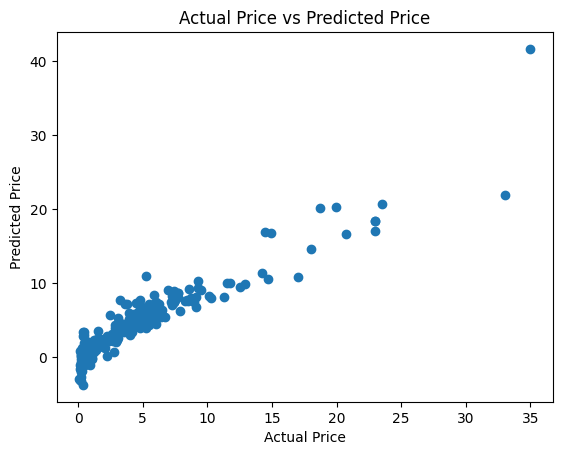

In [19]:
#3yzeen nkaren el real wel predicted
plt.scatter(y_train, train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [20]:
#lasso regression
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [21]:
train_pred2 = lasso_model.predict(x_train)

In [22]:
error2 = r2_score(y_train, train_pred2)
print(error2)

0.843587395258283


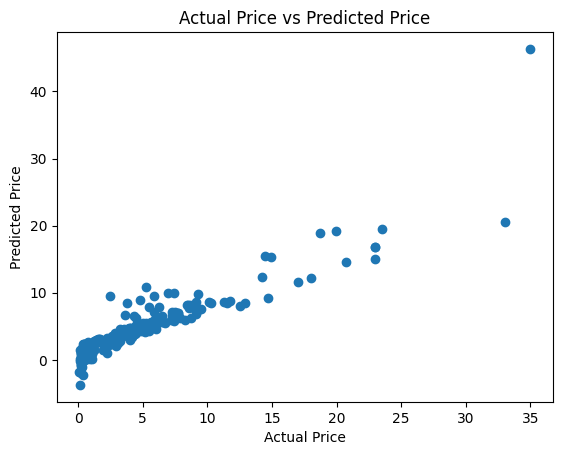

In [23]:
#3yzeen nkaren el real wel predicted
plt.scatter(y_train, train_pred2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

summary: linear is better

In [30]:
input_data = ("swift",2014,4.6,6.87,42450,"Diesel","Dealer","Manual",0)
fuel_type= {"Petrol": 0, "Diesel": 1, "CNG": 2}
seller_type= {"Dealer": 0, "Individual": 1}
transmission = {"Manual": 0, "Automatic": 1}

# hnreplace el string values bel numerical bt3hom
input_data = (
    fuel_type.get(input_data[5], input_data[5]), # awl value byb2a el new w tany byb2a el old
    seller_type.get(input_data[6], input_data[6]),
    transmission.get(input_data[7], input_data[7]),
    input_data[1],
    input_data[2],
    input_data[3],
    input_data[8],


)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lin_model.predict(input_data_reshaped)
print("predicted car price: ",prediction)

predicted car price:  [2920.77471746]
